# Climate Indices — Example Session

## Command-Line Interface / File Based

In [1]:
!climate_index_collection_run --help

/bin/bash: climate_index_collection_run: command not found


In [2]:
!climate_index_collection_run --input-path ../data/test_data/ --output-path . 

/bin/bash: climate_index_collection_run: command not found


### Resulting output data

In [3]:
!head -n5 climate_indices.csv

head: cannot open 'climate_indices.csv' for reading: No such file or directory


### Read outputs and have a look

In [4]:
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [5]:
climind = pd.read_csv("climate_indices.csv")
display(climind)

FileNotFoundError: [Errno 2] No such file or directory: 'climate_indices.csv'

In [ ]:
ax = sns.violinplot(
    data=climind,
    hue="model",
    y="index",
    x="value",
)

## Directly calling the module

In [1]:
from climate_index_collection.output import compute_index
from climate_index_collection.indices import (
    north_atlantic_oscillation,
    southern_annular_mode,
    el_nino_southern_oscillation_34,
)
from climate_index_collection.data_loading import load_data_set
from climate_index_collection.data_specs import latitude_longitude_specs
import numpy as np

In [2]:
cesm_data = load_data_set(data_path="../data/test_data/", data_source_name="CESM")
foci_data = load_data_set(data_path="../data/test_data/", data_source_name="FOCI")

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


### Problem
there is the problem of the files not having the same structure in latitude direction
Need to automaticate this

In [3]:
print('FOCI')
display(latitude_longitude_specs(foci_data))

print('CESM')
display(latitude_longitude_specs(cesm_data))

FOCI


{'lat': {'mini': -88.57216851400727,
  'mini_pos': 95,
  'maxi': 88.57216851400727,
  'maxi_pos': 0,
  'size': 96,
  'diff_constant': False,
  'diff_sign': False,
  'diff': None},
 'lon': {'mini': 0.0,
  'mini_pos': 0,
  'maxi': 358.125,
  'maxi_pos': 191,
  'size': 192,
  'diff_constant': True,
  'diff_sign': True,
  'diff': 1.875}}

CESM
[ 1  2  6  7 11 12 15 16 17 18 19 20 22 23 24 25 27 28 29 33 34 38 39 40
 41 42 44 45 47 49 50 51 53 54 55 56 60 61 63 64 65 66 67 69 70 71 72 74
 75 76 77 79 81 85 86 90 91]


{'lat': {'mini': -90.0,
  'mini_pos': 0,
  'maxi': 89.99999999999999,
  'maxi_pos': 95,
  'size': 96,
  'diff_constant': False,
  'diff_sign': True,
  'diff': None},
 'lon': {'mini': 0.0,
  'mini_pos': 0,
  'maxi': 357.5,
  'maxi_pos': 143,
  'size': 144,
  'diff_constant': True,
  'diff_sign': True,
  'diff': 2.5}}

<xarray.DataArray (time: 120)>
dask.array<getitem, shape=(120,), dtype=float64, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

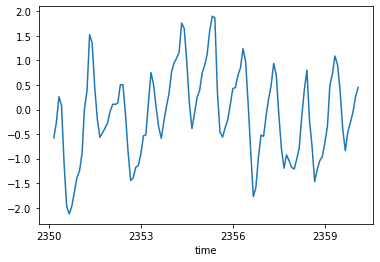

In [4]:
FOCI_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="FOCI", 
    index_function=el_nino_southern_oscillation_34,
)
display(FOCI_ENSO)
FOCI_ENSO.plot();

[ 1  2  6  7 11 12 15 16 17 18 19 20 22 23 24 25 27 28 29 33 34 38 39 40
 41 42 44 45 47 49 50 51 53 54 55 56 60 61 63 64 65 66 67 69 70 71 72 74
 75 76 77 79 81 85 86 90 91]


<xarray.DataArray (time: 120)>
dask.array<getitem, shape=(120,), dtype=float64, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-03-01 00:00:00 ... 0011-02-01 00:00:00

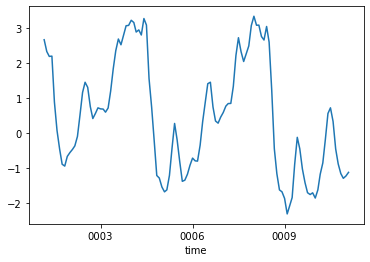

In [5]:
CESM_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="CESM", 
    index_function=el_nino_southern_oscillation_34,
)
display(CESM_ENSO)
CESM_ENSO.plot();